In [52]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd

In [2]:
cancer=load_breast_cancer()

In [3]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [4]:
# default settings
tree=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [5]:
# pre-pruning
treePruned=DecisionTreeClassifier(random_state=0,max_depth=4).fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(treePruned.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(treePruned.score(X_test,y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [9]:
export_graphviz(treePruned,out_file="tree.dot",class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False, filled=True)

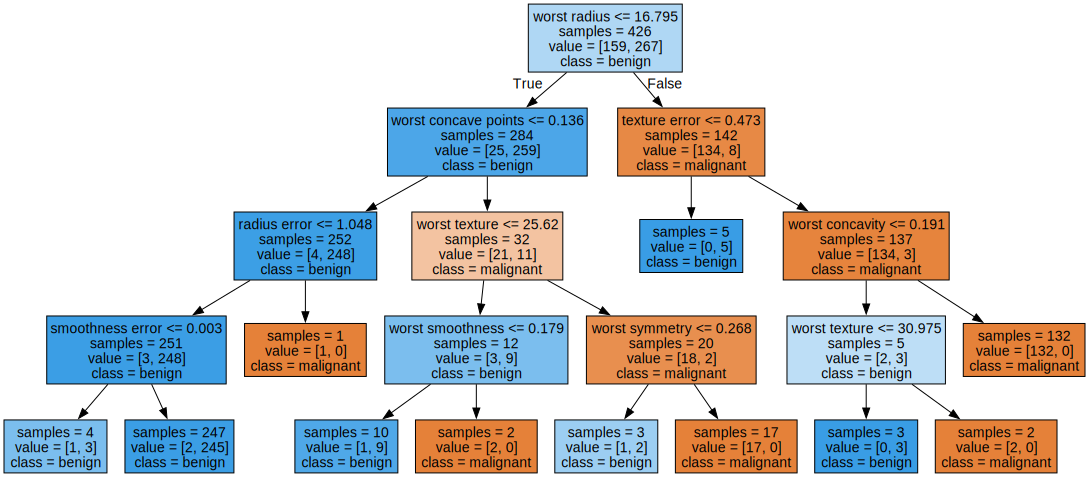

In [12]:
with open("tree.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [14]:
# Feature importance
print("Feature Importances:")
print(treePruned.feature_importances_)

Feature Importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [23]:
# plot feature importance:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(10,8))
    n_features=cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Featue")
    plt.ylim(-1,n_features)

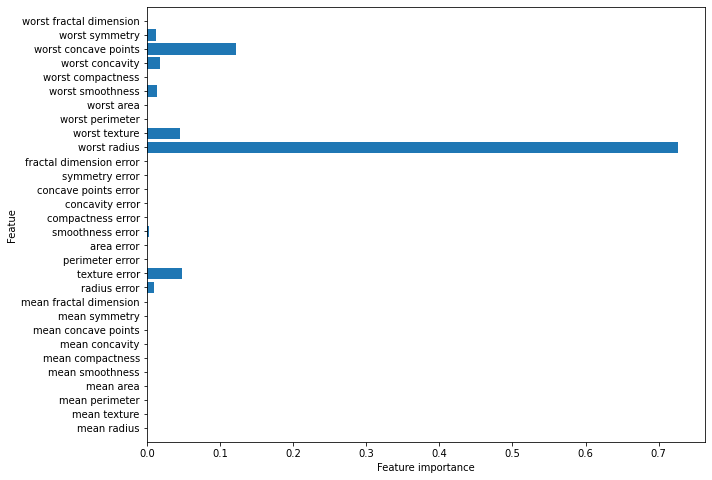

In [24]:
plot_feature_importances_cancer(treePruned)

<p style="font-fmaily:Geneva; font-size:25px"> Tree models cannpt be extrapolated or used to make predictions outside the range of Training data

In [31]:
ram_prices=pd.read_csv('/Users/daneshwari510/Desktop/DSPrep/IntroductionToMLwithPython/introduction_to_ml_with_python-main/data/ram_price.csv')

Text(0, 0.5, 'Price in $/Mbyte')

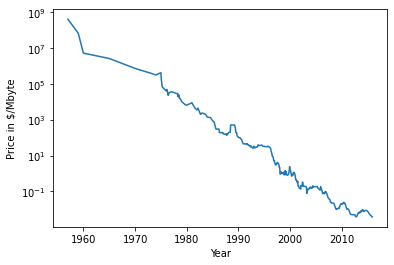

In [32]:
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('Year')
plt.ylabel("Price in $/Mbyte")

In [35]:
# use historical data to forecast after the year 2000
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]

In [44]:
# predict prices based on date
X_train=np.array(data_train.date).reshape(-1,1)

In [47]:
# log transform price
y_train=np.log(data_train.price)

In [53]:
tree=DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

In [54]:
# all data
X_all=np.array(ram_prices.date).reshape(-1,1)

In [55]:
# predict on all data
pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

In [56]:
# undo log-transform
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

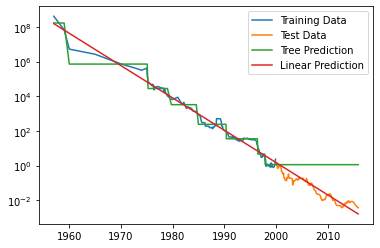

In [58]:
# compare predictions with ground truth
plt.semilogy(data_train.date,data_train.price,label="Training Data")
plt.semilogy(data_test.date,data_test.price,label="Test Data")
plt.semilogy(ram_prices.date,price_tree,label="Tree Prediction")
plt.semilogy(ram_prices.date,price_lr,label="Linear Prediction")
plt.legend()